In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
pd.set_option('Display.Max_Columns', 100)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above summary we can see that there are no null values in the data, but we need to check for any irrelevant punctuation marks present in the data.

In [6]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

As we can see from the above that there values like (?) in the data. We need to convert those values as null.

In [7]:
df[df == ' ?'] = np.nan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - workclass, occupation and native.country contains missing values. We can fill these values of these categorical variables with the most frequent values = 'Mode'.

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

Convert the null values with the Mode.

In [10]:
for col in['workclass', 'occupation', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

   Now there are no null values in the data. Now let us do some Exploratory Data Analysis with the features present in the data.

# EDA - EXPLORATORY DATA ANALYSIS
From this data we will treat the last Feature i.e. __Salary__ as the dependent variable or the label outcomes to classify and train the model.

In [12]:
df['salary'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

From the above, we can say most of the values in salary are imbalanced and lies on one side of the data.

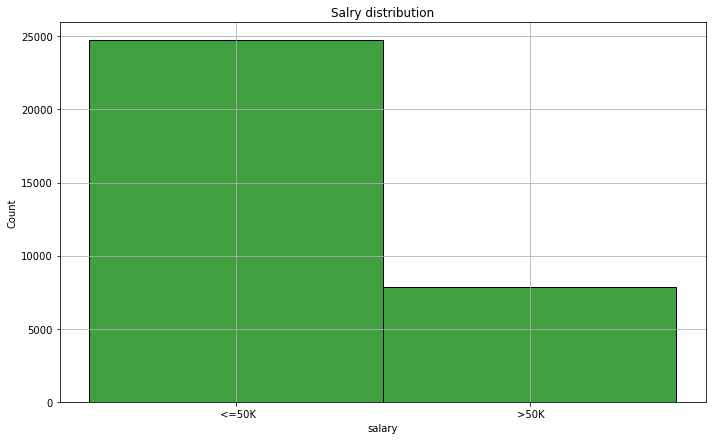

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary'], color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Salry distribution')
plt.show()

From the above graph also we can interprete that the data is _Skewed_ to one side, hence we can implement the sampling method during model evaluation.

__Relationship with the Age and the Salary factor__

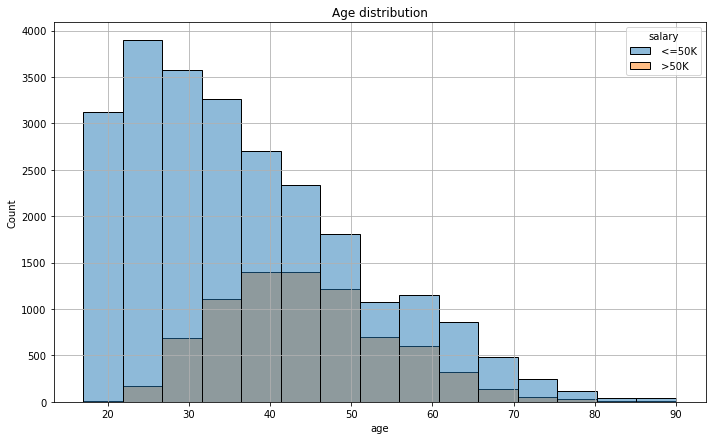

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['age'],hue=df['salary'],color='blue',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

From the above Graph we see that most of the person within the Age bracket of 20-30 are earning salary of less than 50K, and people with age 40-60 are more earning higher salaries.

__Relationship with the Workclass and the Salary factor__

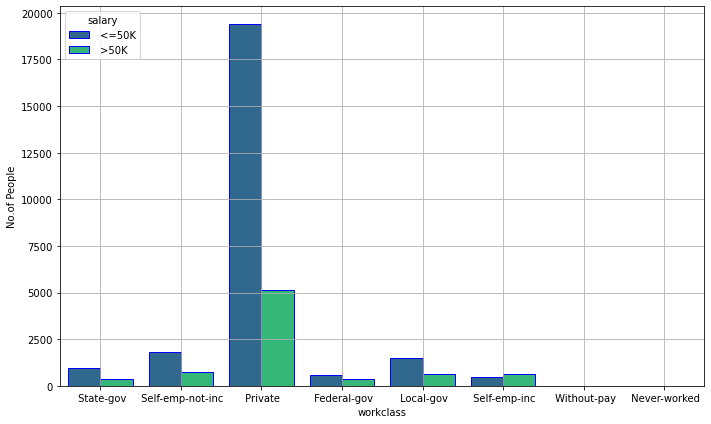

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['workclass'],hue=df['salary'],palette='viridis',saturation=1.0,edgecolor="blue")
plt.tight_layout()
plt.ylabel('No.of People')
plt.grid(True)
plt.show()

The above graph depicts majority of the people works in Private sector in which <50k earnings are more than the >50k salaried people.

__Relationship with the Education and the Salary factor__

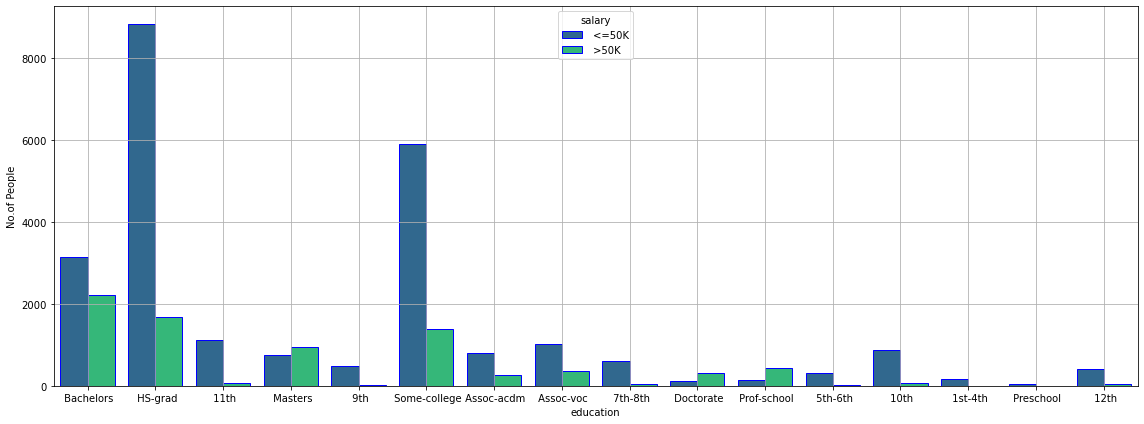

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['education'],hue=df['salary'],palette='viridis',saturation=1.0,edgecolor="blue")
plt.tight_layout()
plt.ylabel('No.of People')
plt.grid(True)
plt.show()

In the above graph, the HS-grad show more earning potential among the people. And only a few number of people has possed Docorate with higher income.

__Relationship with the Marital status and the Salary factor__

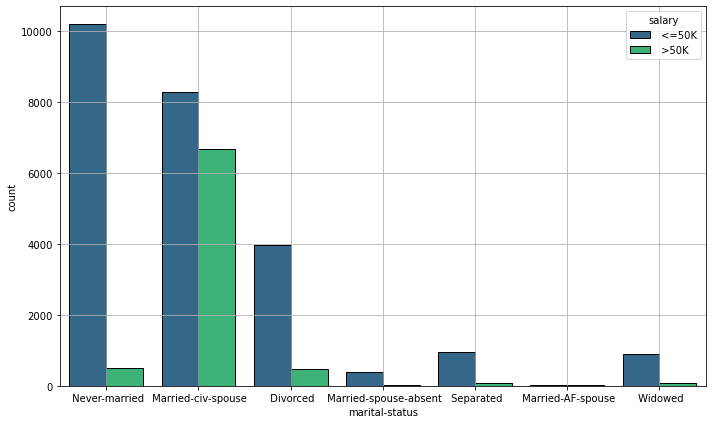

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['marital-status'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

The Graph represent that Married and staying along with spouse has more earning with above 50K, where never married people has potential to earn less than 50k.

__Relationship with the Occupation and the Salary factor__

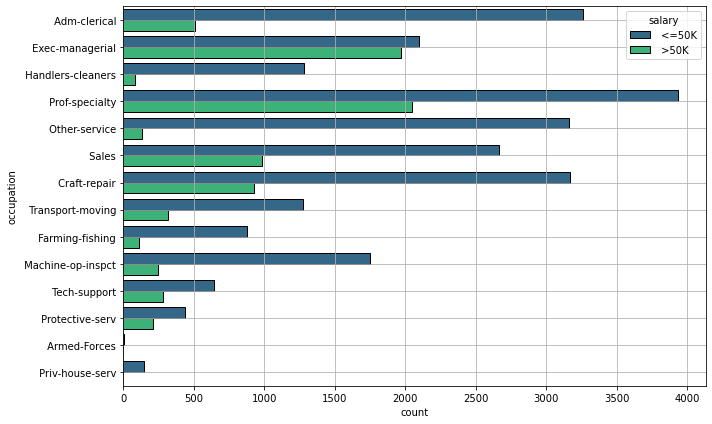

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

The above graph shows some uniformity in the data, as most of the people falls in th prof-speciality category, which gives higher income in the profession services.

__Relationship with the Relation and the Salary factor__

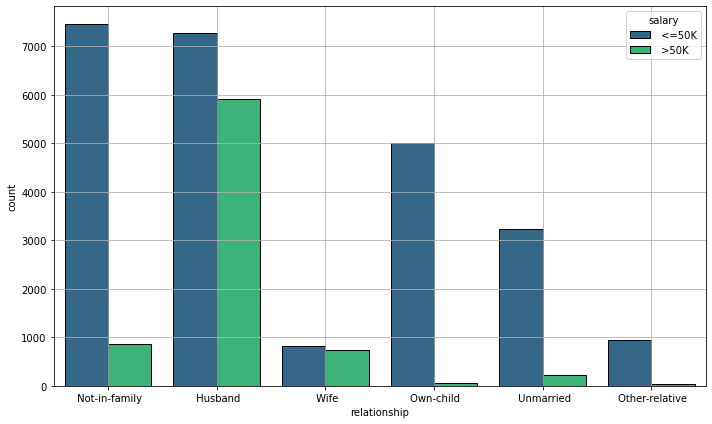

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['relationship'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

The above shows the same results as the marital status in which the married people has high earning potentials, as here its represents the husband category.

__Relationship with the Sex and the Salary factor__

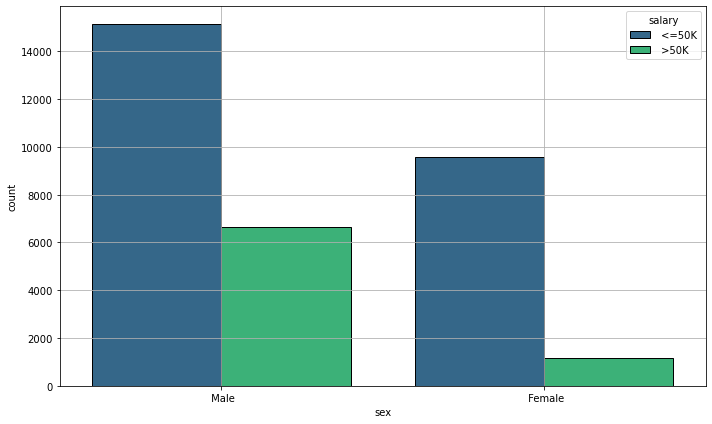

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sex'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

The proportion of males who make more than 50,000 is a good deal greater than the percentage of Female, that make the identical outcome. This can certainly be a sizable aspect, and must be a feature taken into consideration in our prediction model.

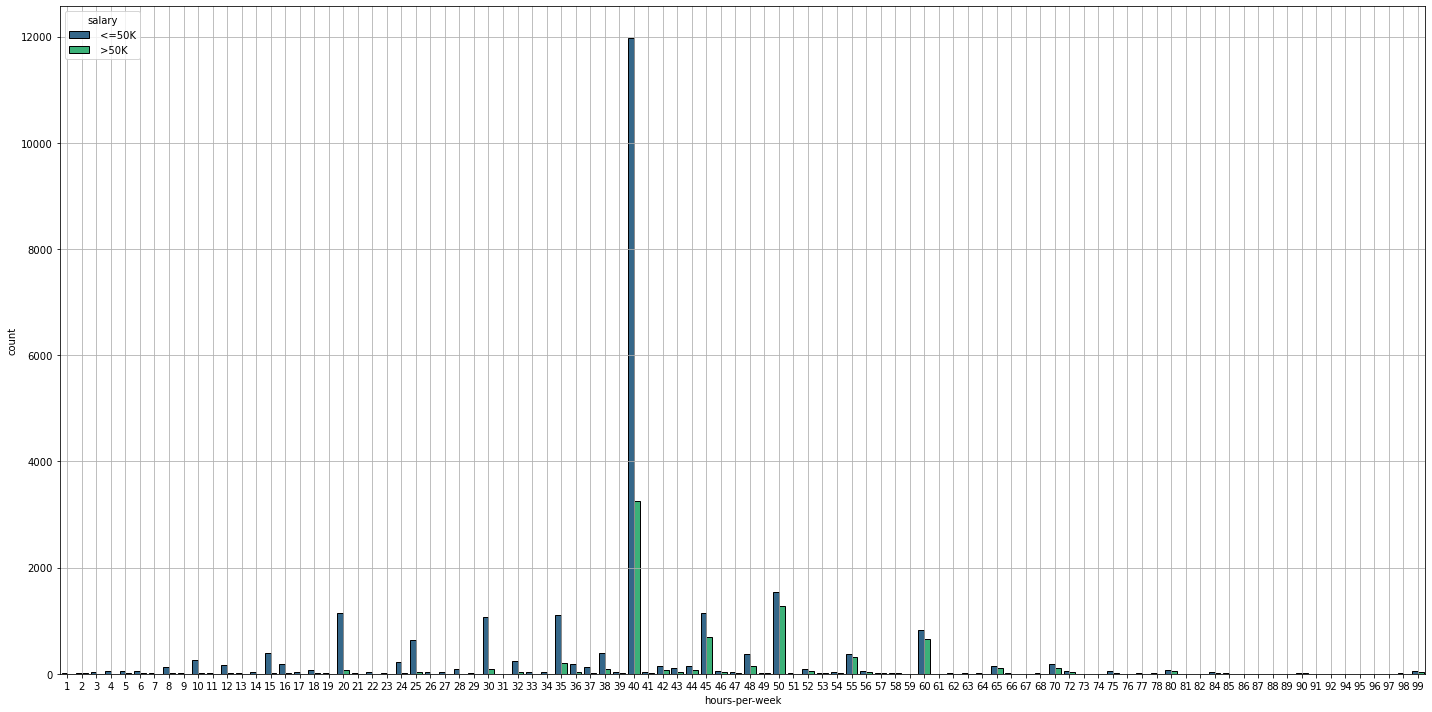

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['hours-per-week'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black",)
plt.tight_layout()
plt.grid(True)
plt.show()

From the above graph we say that data is showing a high precision on the 40 hours per week for both the salary trends of the people. And the earning has increased with increase in the working hours.

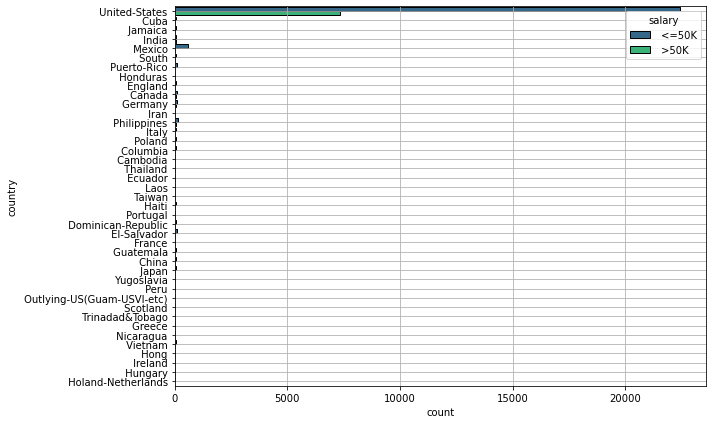

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'], hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

From the above graph most of the people are from USA, so we can drop this feature from our dataset, to improve the prediction results. Then we can go ahead and do the feature engineer to proceed which the evaluation.

# Feature Engineering
As in the data most of the features are in form of categorical data, will need to implent label encoding to train the machine as the classfication data points to apply the final model.

In [29]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [30]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [31]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


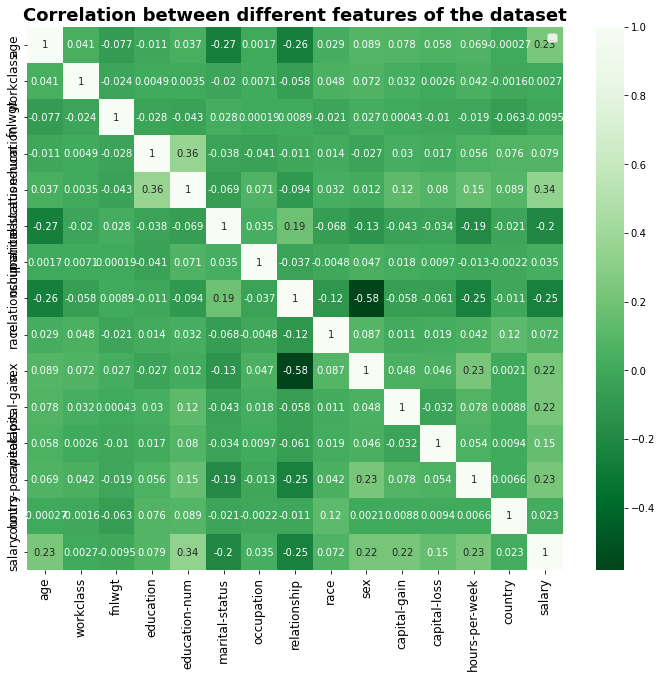

In [32]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

From the above map we can select the more relational variables with the salary and drop the other features which has less relation with the salary, like fnlwgt, education, marital status, relationship, and country. Now let's drop the feature which is not required by the model.

In [35]:
x = df.drop(["fnlwgt", "education", "marital-status", "relationship", "country"], axis=1)

In [38]:
x

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,6,13,0,4,1,2174,0,40,0
1,50,5,13,3,4,1,0,0,13,0
2,38,3,9,5,4,1,0,0,40,0
3,53,3,7,5,2,1,0,0,40,0
4,28,3,13,9,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,12,4,0,0,0,38,0
32557,40,3,9,6,4,1,0,0,40,1
32558,58,3,9,0,4,0,0,0,40,0
32559,22,3,9,0,4,1,0,0,20,0


Now will select the indenpent variables and dependent variable for the model.

In [55]:
X = df.drop(['salary'], axis=1)
X
Y = df.salary

In [40]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [57]:
Y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

Balancing the data through SMOTE over sampling technique to balance the outcome variable.

In [44]:
from imblearn.over_sampling import SMOTE

In [65]:
sampler = SMOTE()

In [66]:
xr, yr = sampler.fit_resample(X, Y)

In [67]:
yr.value_counts()

0    24720
1    24720
Name: salary, dtype: int64

Balanced the skewed data with the SMOTE over-sampling technique, SMOTE (Synthetic Minority Over-sampling Technique), where the synthetic samples are generated for the minority class and distributed among the data points to reduce the noise.

Now the data is balanced through SMOTE, and will fit and test the model for the prediction results.

# Model Evaluation
Trained and tested the model on three classfication models
1. __Logistic Regression 2. Random Forest 3. Support Vector Machine (SVM)__
* Trained and Tested the models without hyper-parameter tuning.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(xr, yr, test_size=0.3)

In [104]:
print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)
print("y_train shape:", ytrain.shape)
print("y_test shape:", ytest.shape)

X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


Traning and testing all three models at once, genetaring the scores for the same and then picking the best model.

In [103]:
models={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector machine": SVC()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain)
    
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    
    
    model_train_accuracy = accuracy_score(ytrain,ytrain_pred)
    model_train_f1 = f1_score(ytrain,ytrain_pred,average='weighted')
    model_train_precision = precision_score(ytrain,ytrain_pred)
    model_train_recall = recall_score(ytrain,ytrain_pred)
    
    
    model_test_accuracy = accuracy_score(ytest,ytest_pred)
    model_test_f1 = f1_score(ytest,ytest_pred,average='weighted')
    model_test_precision = precision_score(ytest,ytest_pred)
    model_test_recall = recall_score(ytest,ytest_pred)
    
    
    print(list(models.keys())[i])

    print('Model performance for training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))

    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print('---------------------------')

    print('Model performance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print('='*35)
    print('\n')
    

Logistic Regression
Model performance for training set
- Accuracy: 0.6646
- F1 score: 0.6634
- Precision: 0.6868
- Recall: 0.6055
---------------------------
Model performance for test set
- Accuracy: 0.6606
- F1 score: 0.6596
- Precision: 0.6797
- Recall: 0.6065


Random Forest Classifier
Model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
---------------------------
Model performance for test set
- Accuracy: 0.8892
- F1 score: 0.8892
- Precision: 0.8906
- Recall: 0.8873


Support Vector machine
Model performance for training set
- Accuracy: 0.5936
- F1 score: 0.5203
- Precision: 0.9298
- Recall: 0.2027
---------------------------
Model performance for test set
- Accuracy: 0.5910
- F1 score: 0.5160
- Precision: 0.9264
- Recall: 0.1971




From the above model Logistic regression and Support vector machine has failed to give good scores,
Whereas __RandomForestclassifier__ with best results of 
- Accuracy: 0.8892
- F1 score: 0.8892
- Precision: 0.8906
- Recall: 0.8873.
/Hence I will perform hyperparameter tuning on this RandomForest model to increase the accuracy and the scores.

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
rf_params= {"max_depth": [int(x) for x in np.linspace(start=40, stop=100, num=7)],
           "min_samples_split": [2, 7, 8, 10, 18, 20],
           "n_estimators": [100, 200, 500,]}

In [123]:
rf_params

{'max_depth': [40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 7, 8, 10, 18, 20],
 'n_estimators': [100, 200, 500]}

In [124]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [125]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [40, 50, 60, 70, 80, 90, 100],
   'min_samples_split': [2, 7, 8, 10, 18, 20],
   'n_estimators': [100, 200, 500]})]

In [ ]:
rf_model = Ra

In [132]:
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=12,
                                   cv=3,
                                   n_jobs=-1)
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'max_depth': [40, 50, 60, 70, 80, 90,
                                                      100],
                                        'min_samples_split': [2, 7, 8, 10, 18,
                                                              20],
                                        'n_estimators': [100, 200, 500]})

In [137]:
random.best_params_

{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 100}

In [138]:
random.best_score_

0.8914123901987979

Now traning the model with the above given parameters to get the best results.

In [139]:
Final_RF = RandomForestClassifier(n_estimators=200, min_samples_split=8, max_depth=90)

In [140]:
Final_RF.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=90, min_samples_split=8, n_estimators=200)

In [141]:
Final_RF_pred = Final_RF.predict(xtest)

In [142]:
model_test_accuracy = accuracy_score(ytest,Final_RF_pred)
model_test_f1 = f1_score(ytest,Final_RF_pred,average='weighted')
model_test_precision = precision_score(ytest,Final_RF_pred)
model_test_recall = recall_score(ytest,Final_RF_pred)

In [150]:
    print('Model performance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))


Model performance for test set
- Accuracy: 0.8921
- F1 score: 0.8921
- Precision: 0.8929
- Recall: 0.8908


In [156]:
print(classification_report(ytest, Final_RF_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7421
           1       0.89      0.89      0.89      7411

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [164]:
cm #confusion matrix

array([[6629,  792],
       [ 809, 6602]], dtype=int64)

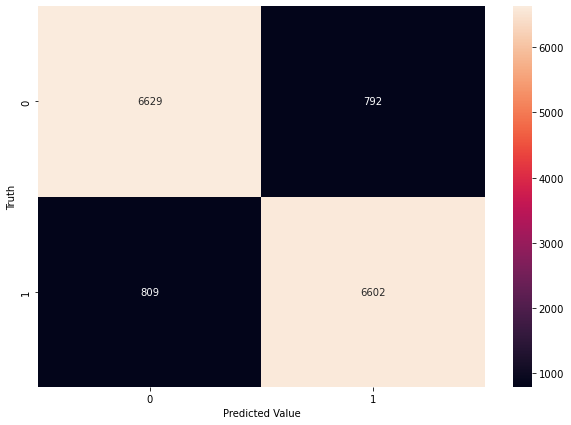

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Final_RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

The final model of RandomForest gives the best output for the data, with precion and scores of close to 90% after hyperparameter tuning. Hence the predicted model can give the accuracy results upto 90% to predict the individual income based on features outcomes.